<class 'function'>


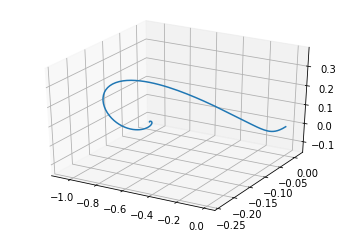

In [27]:
import numpy as np
import scipy.integrate as integrate
import math

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Set coefficients
k = 2.0
b = 0.5
r = 1.0
omega = 1.8

def  duffing3D(t, x):
    omegat = omega 
    dxdt = np.array([x[1],
                    -k * x[1] - x[2] + b * math.cos(omegat),
                    3 * (x[0]**2) * x[1] - x[1]])
    return dxdt

# Initialize variables
t0, t1 = 0, 100                # start and end
t = np.linspace(t0, t1, 1000)  # the points of evaluation of solution
y0 = [0, 0, 0]                   # initial value
y = np.zeros((len(t), len(y0)))   # array for solution
y[0, :] = y0

# Set integrator and start variables
r = integrate.ode(duffing3D).set_integrator("dopri5")  # choice of method
r.set_initial_value(y0, t0)   # initial values

print(type((lambda x,y: 0)))

# Integrate
for i in range(1, t.size):
   y[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   if not r.successful():
       raise RuntimeError("Could not integrate")


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(y[:,0], y[:,1], y[:,2])

